In [ ]:
import kagglehub
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housing-prices-dataset


In [ ]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:

        print(os.path.join(dirname, filename))


/kaggle/input/housing-prices-dataset/Housing.csv


In [ ]:
df = pd.read_csv('/kaggle/input/housing-prices-dataset/Housing.csv')

In [ ]:
print(f"Dataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns\n")
print("First 5 rows of the dataset:")
display(df.head())

Dataset dimensions: 545 rows and 13 columns

First 5 rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
print("\nData types and non-null counts:")
df.info()


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicate_count}")


Number of duplicate records: 0


In [ ]:
print("Statistical summary of numerical features:")
display(df.describe())

Statistical summary of numerical features:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
print("\nFrequency distribution of categorical variables:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Proportion:\n{df[col].value_counts(normalize=True)}")


Frequency distribution of categorical variables:

mainroad:
mainroad
yes    468
no      77
Name: count, dtype: int64
Proportion:
mainroad
yes    0.858716
no     0.141284
Name: proportion, dtype: float64

guestroom:
guestroom
no     448
yes     97
Name: count, dtype: int64
Proportion:
guestroom
no     0.822018
yes    0.177982
Name: proportion, dtype: float64

basement:
basement
no     354
yes    191
Name: count, dtype: int64
Proportion:
basement
no     0.649541
yes    0.350459
Name: proportion, dtype: float64

hotwaterheating:
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
Proportion:
hotwaterheating
no     0.954128
yes    0.045872
Name: proportion, dtype: float64

airconditioning:
airconditioning
no     373
yes    172
Name: count, dtype: int64
Proportion:
airconditioning
no     0.684404
yes    0.315596
Name: proportion, dtype: float64

prefarea:
prefarea
no     417
yes    128
Name: count, dtype: int64
Proportion:
prefarea
no     0.765138
yes    0.234862
Name: proporti

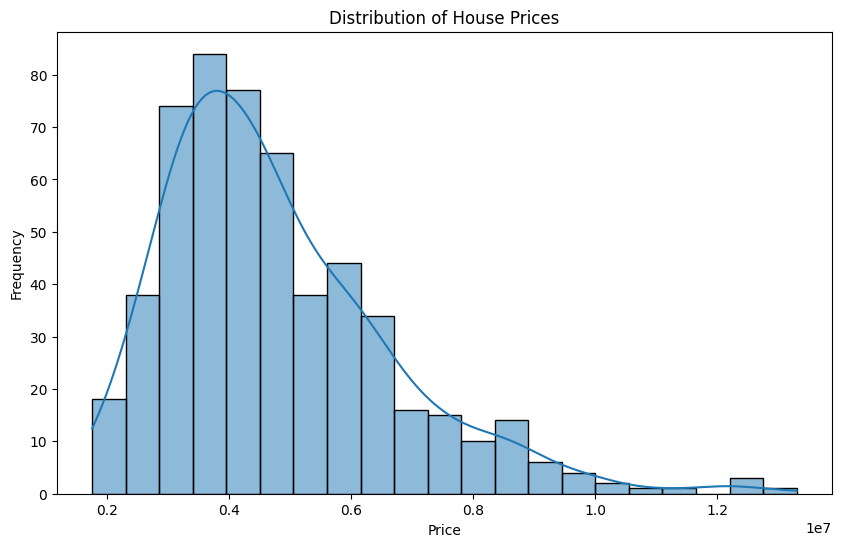

Price statistics:
Min: 1750000
Max: 13300000
Mean: 4766729.25
Median: 4340000.00
Standard deviation: 1870439.62
Skewness: 1.21


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

print(f"Price statistics:")
print(f"Min: {df['price'].min()}")
print(f"Max: {df['price'].max()}")
print(f"Mean: {df['price'].mean():.2f}")
print(f"Median: {df['price'].median():.2f}")
print(f"Standard deviation: {df['price'].std():.2f}")
print(f"Skewness: {df['price'].skew():.2f}")

In [ ]:
df_numeric = df.copy()
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df_numeric[col] = df_numeric[col].map({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0})

In [ ]:
df_numeric = pd.get_dummies(df_numeric, columns=['furnishingstatus'], drop_first=True)
display(df_numeric.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


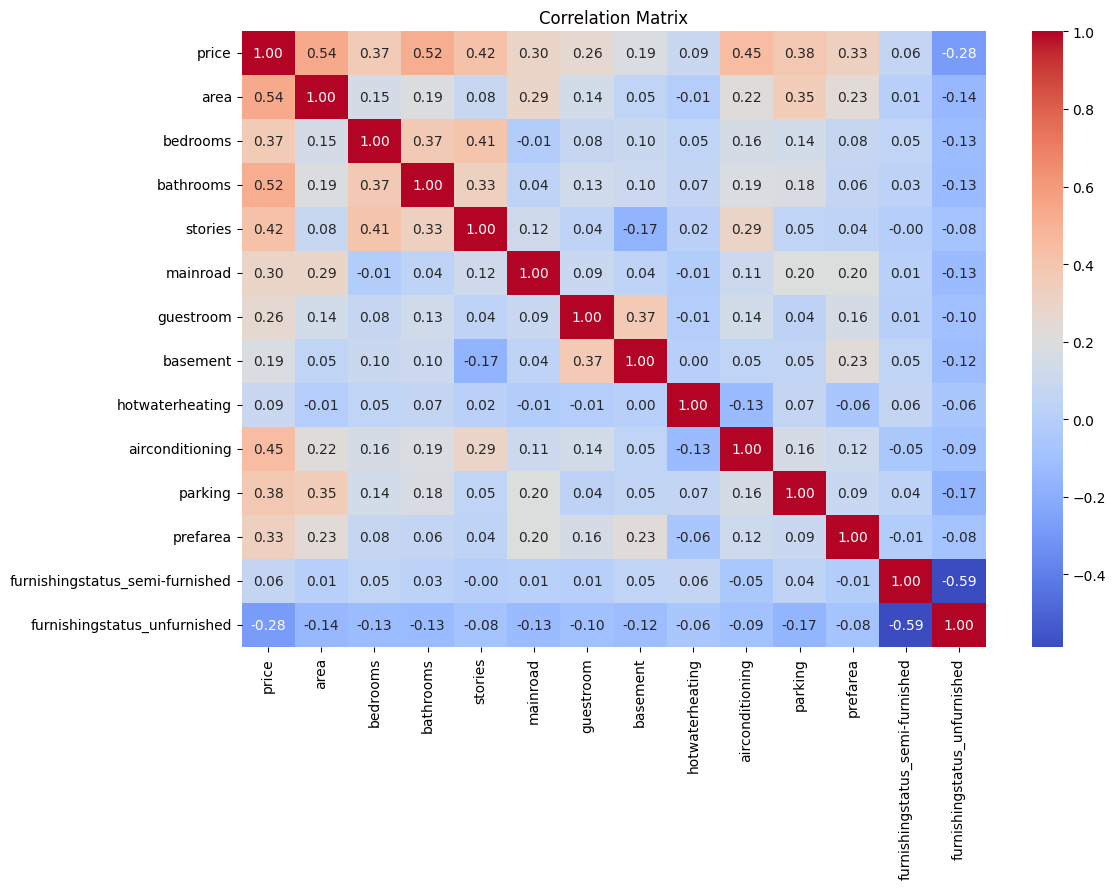

In [ ]:
correlation = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
price_correlation = correlation['price'].sort_values(ascending=False)
print("Top correlations with price:")
print(price_correlation)

Top correlations with price:
price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning                    0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea                           0.329777
mainroad                           0.296898
guestroom                          0.255517
basement                           0.187057
hotwaterheating                    0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


In [ ]:
df_cleaned = df.copy()

In [ ]:
duplicate_count = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicate_count}")


Number of duplicate records: 0



Checking for outliers in numerical columns using IQR method:


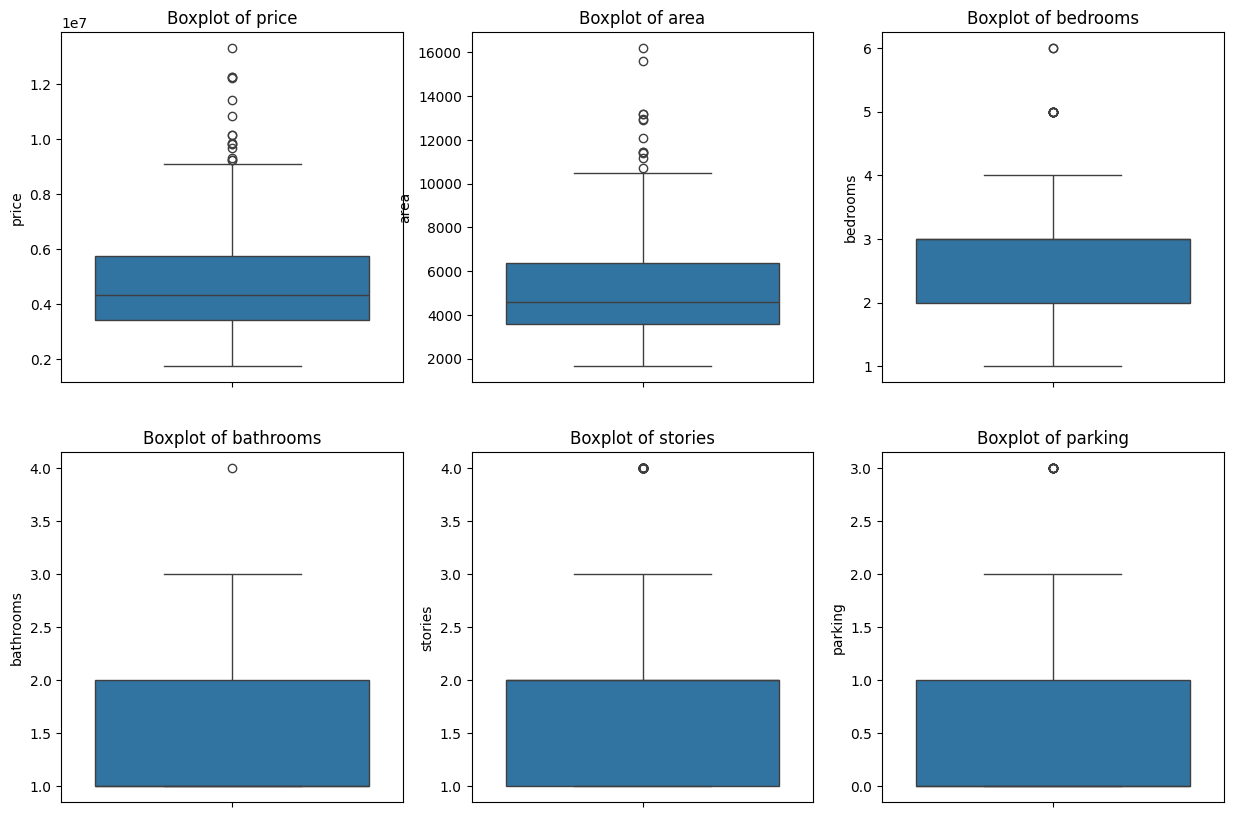

In [ ]:
print("\nChecking for outliers in numerical columns using IQR method:")
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot of {col}')

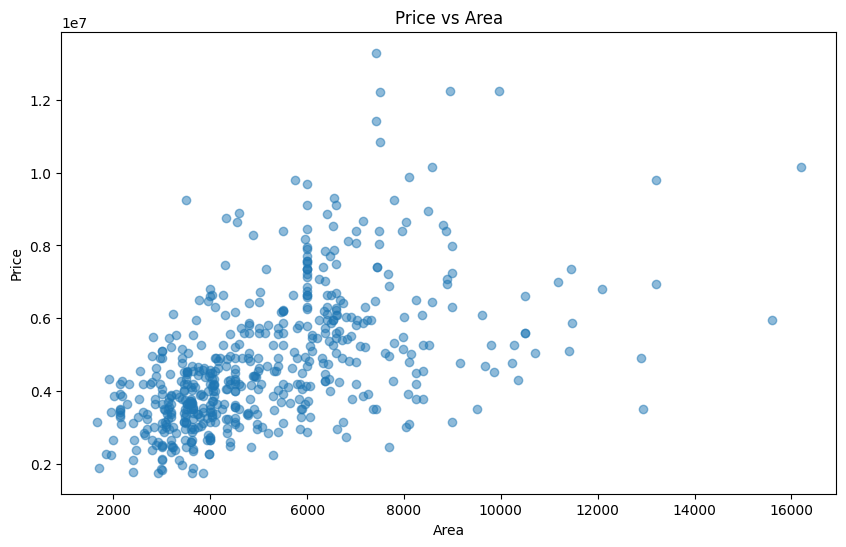

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['area'], df_cleaned['price'], alpha=0.5)
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [ ]:
df_log = df_cleaned.copy()
df_log['price_log'] = np.log(df_log['price'])

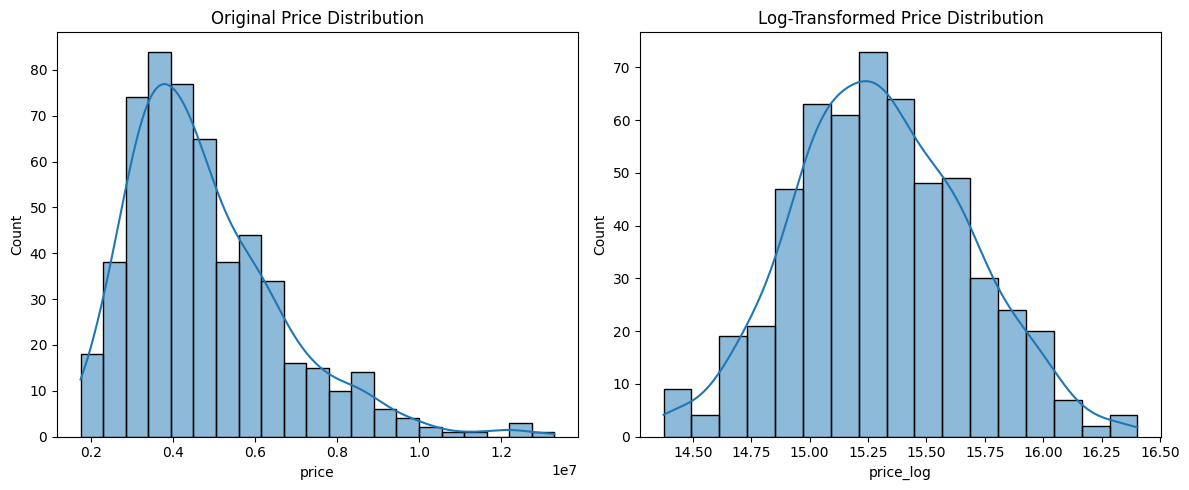

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_log['price'], kde=True)
plt.title('Original Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_log['price_log'], kde=True)
plt.title('Log-Transformed Price Distribution')
plt.tight_layout()
plt.show()

In [ ]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df_log[col] = df_log[col].map({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0})

print("\nAfter converting binary categorical variables:")
print(df_log[binary_cols].head())


After converting binary categorical variables:
   mainroad  guestroom  basement  hotwaterheating  airconditioning  prefarea
0         1          0         0                0                1         1
1         1          0         0                0                1         0
2         1          0         1                0                0         1
3         1          0         1                0                1         1
4         1          1         1                0                1         0


In [ ]:
df_log = pd.get_dummies(df_log, columns=['furnishingstatus'], drop_first=True)

In [ ]:
boolean_cols = ['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
for col in boolean_cols:
    df_log[col] = df_log[col].astype(int)

In [ ]:
df_log.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price_log,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,16.403275,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,16.321036,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,16.321036,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,16.318175,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,16.250001,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [ ]:
scaler_std = StandardScaler()
df_log_std = df_log.copy()
df_log_std[num_features] = scaler_std.fit_transform(df_log[num_features])

In [ ]:
scaler_minmax = MinMaxScaler()
df_log_minmax = df_log.copy()
df_log_minmax[num_features] = scaler_minmax.fit_transform(df_log[num_features])


In [ ]:
scaler_robust = RobustScaler()
df_log_robust = df_log.copy()
df_log_robust[num_features] = scaler_robust.fit_transform(df_log[num_features])


In [ ]:
# Display the first few rows of each scaled dataset
print("After StandardScaler:")
print(df_log_std[num_features].head())

print("\nAfter MinMaxScaler:")
print(df_log_minmax[num_features].head())

print("\nAfter RobustScaler:")
print(df_log_robust[num_features].head())

# Compare the statistical properties of the scaled data
print("\nStandardScaler statistics:")
print(df_log_std[num_features].describe().loc[['mean', 'std']].round(3))

print("\nMinMaxScaler statistics:")
print(df_log_minmax[num_features].describe().loc[['min', 'max']].round(3))

print("\nRobustScaler statistics:")
print(df_log_robust[num_features].describe().round(3))

After StandardScaler:
       area  bedrooms  bathrooms   stories   parking
0  1.046726  1.403419   1.421812  1.378217  1.517692
1  1.757010  1.403419   5.405809  2.532024  2.679409
2  2.218232  0.047278   1.421812  0.224410  1.517692
3  1.083624  1.403419   1.421812  0.224410  2.679409
4  1.046726  1.403419  -0.570187  0.224410  1.517692

After MinMaxScaler:
       area  bedrooms  bathrooms   stories   parking
0  0.396564       0.6   0.333333  0.666667  0.666667
1  0.502405       0.6   1.000000  1.000000  1.000000
2  0.571134       0.4   0.333333  0.333333  0.666667
3  0.402062       0.6   0.333333  0.333333  1.000000
4  0.396564       0.6   0.000000  0.333333  0.666667

After RobustScaler:
       area  bedrooms  bathrooms  stories  parking
0  1.021739       1.0        1.0      1.0      2.0
1  1.579710       1.0        3.0      2.0      3.0
2  1.942029       0.0        1.0      0.0      2.0
3  1.050725       1.0        1.0      0.0      3.0
4  1.021739       1.0        0.0      0.0    

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_log_std.drop(['price', 'price_log'], axis=1)

In [ ]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(X.shape[1])]

In [ ]:
print("Variance Inflation Factors:")
print(vif_data.sort_values("VIF", ascending=False))


Variance Inflation Factors:
                            Feature       VIF
4                          mainroad  3.727078
11  furnishingstatus_semi-furnished  2.031244
6                          basement  1.995314
12     furnishingstatus_unfurnished  1.784739
8                   airconditioning  1.663988
10                         prefarea  1.500173
5                         guestroom  1.473259
3                           stories  1.465830
1                          bedrooms  1.363943
0                              area  1.286408
2                         bathrooms  1.286360
9                           parking  1.206630
7                   hotwaterheating  1.079212


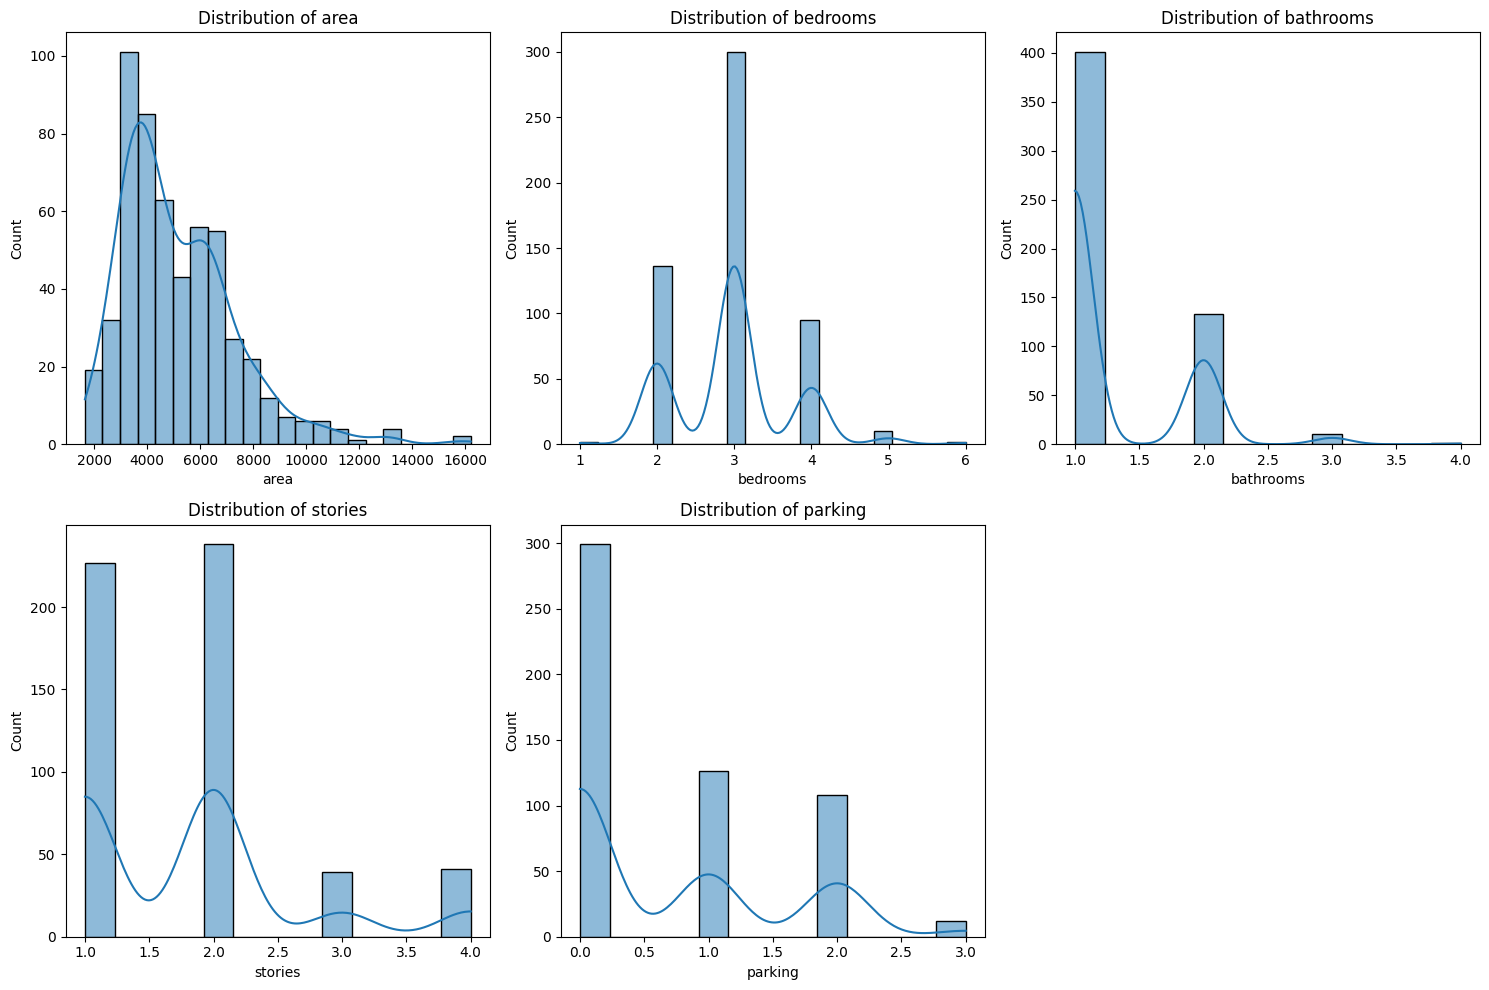

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['area', 'bedrooms', 'bathrooms', 'stories', 'parking']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_log[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

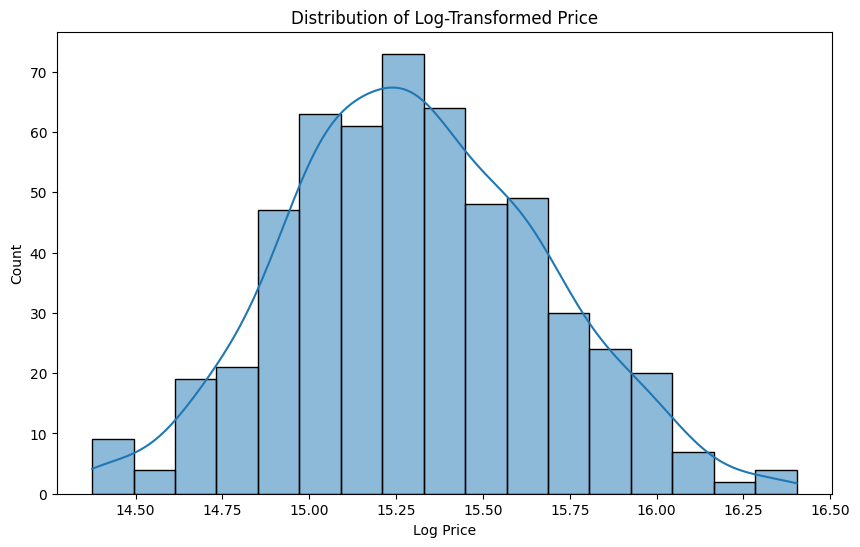

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_log['price_log'], kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('Log Price')
plt.show()

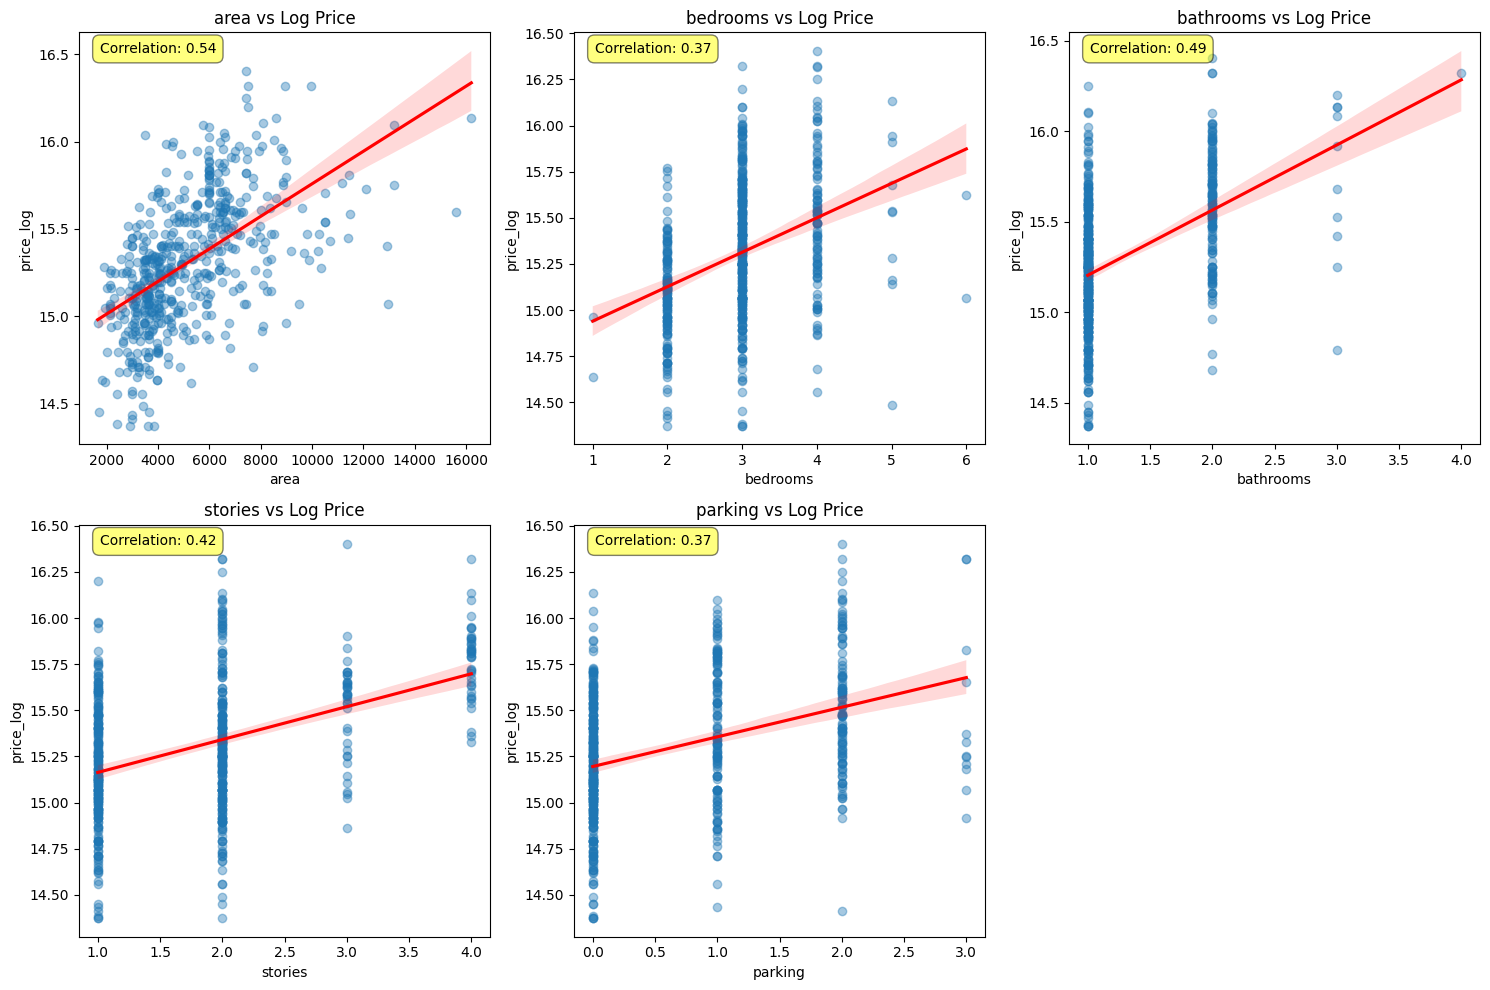

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['area', 'bedrooms', 'bathrooms', 'stories', 'parking']):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=col, y='price_log', data=df_log, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    plt.title(f'{col} vs Log Price')

    corr = df_log[col].corr(df_log['price_log'])
    plt.annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
plt.tight_layout()
plt.show()

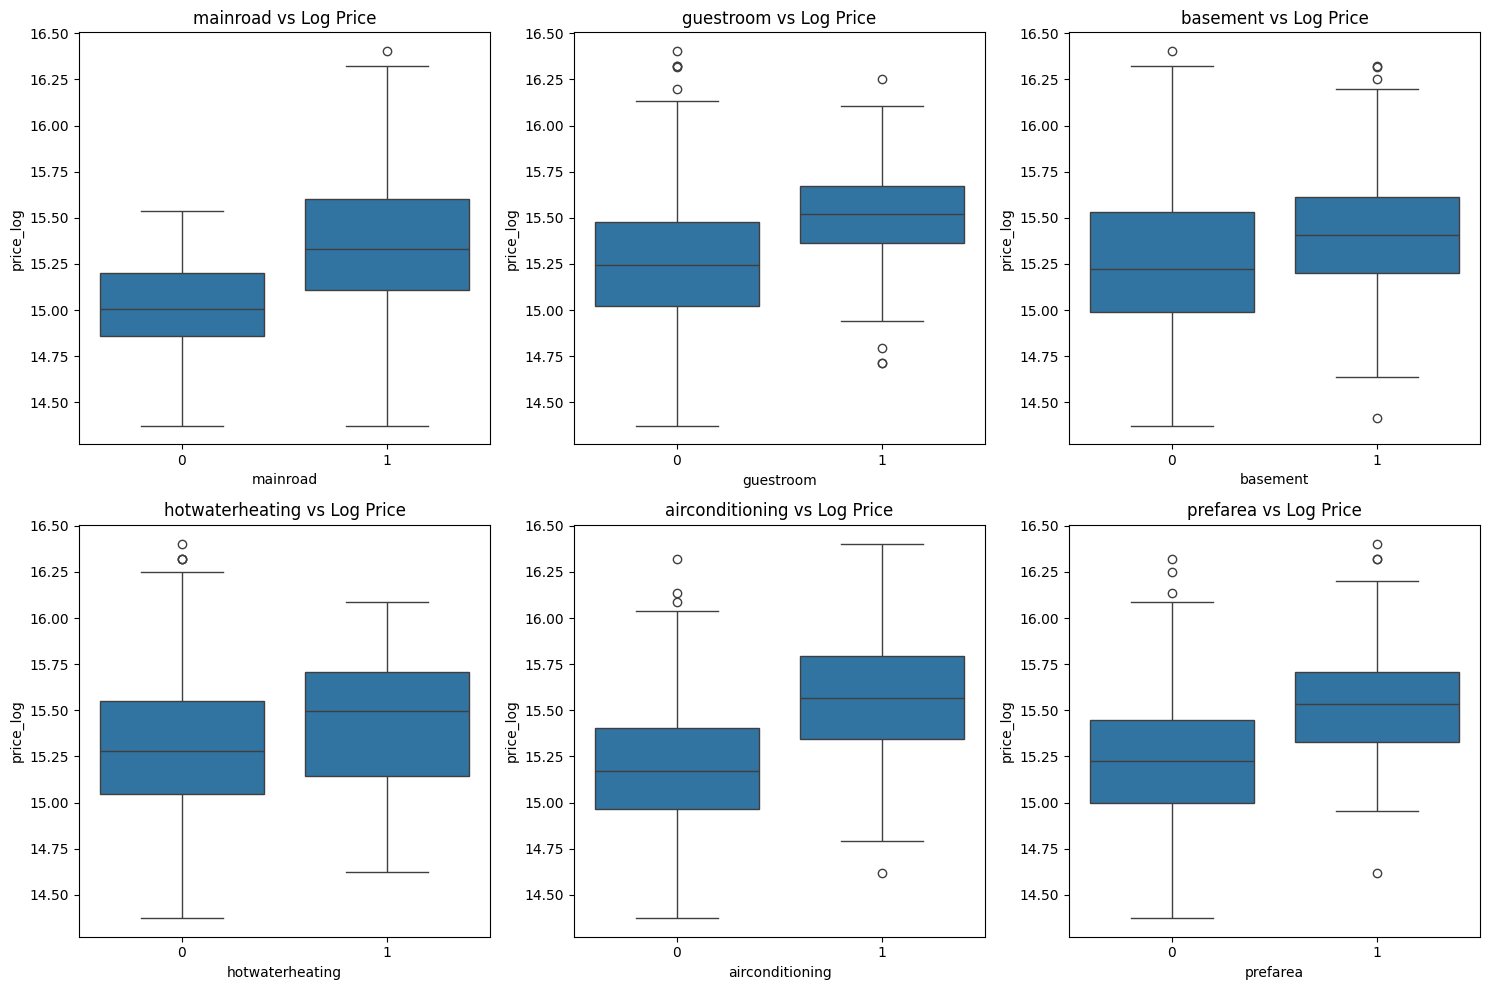

In [ ]:
plt.figure(figsize=(15, 10))
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                   'airconditioning', 'prefarea']
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=col, y='price_log', data=df_log)
    plt.title(f'{col} vs Log Price')
plt.tight_layout()
plt.show()

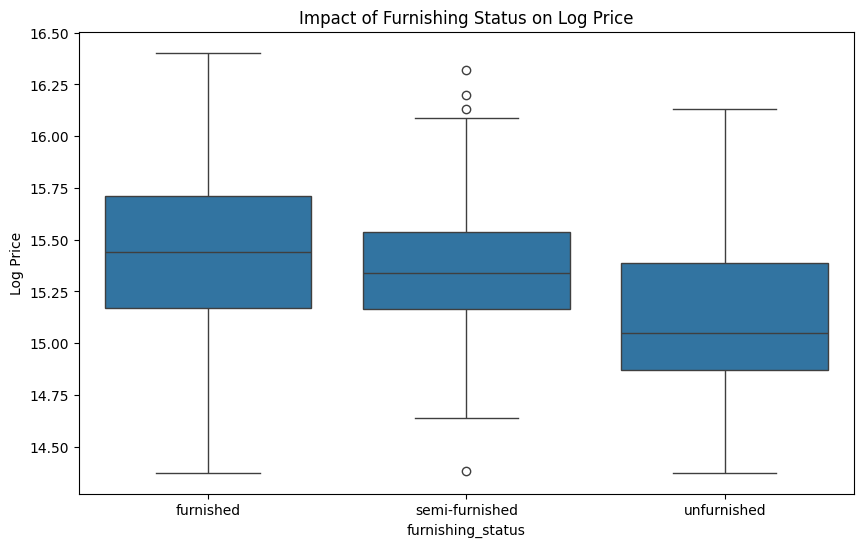

In [ ]:
plt.figure(figsize=(10, 6))
furnishing_data = df_log.copy()
furnishing_data['furnishing_status'] = 'furnished'
furnishing_data.loc[df_log['furnishingstatus_semi-furnished'] == 1, 'furnishing_status'] = 'semi-furnished'
furnishing_data.loc[df_log['furnishingstatus_unfurnished'] == 1, 'furnishing_status'] = 'unfurnished'

sns.boxplot(x='furnishing_status', y='price_log', data=furnishing_data)
plt.title('Impact of Furnishing Status on Log Price')
plt.ylabel('Log Price')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
target = 'price_log'
X_std = df_log_std.drop(columns=[target])
y_std = df_log_std[target]
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_std, y_train_std)

LinearRegression()

In [ ]:
y_pred_std = lr_model.predict(X_test_std)

In [ ]:
comparison = pd.DataFrame({
    'Actual': y_test_std,
    'Predicted': y_pred_std
})
print(comparison.head())

        Actual  Predicted
316  15.216694  15.124156
77   15.710127  15.679595
360  15.126542  15.117677
90   15.678039  15.645340
493  14.845130  14.936150


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
r2 = r2_score(y_test_std, y_pred_std)
mae = mean_absolute_error(y_test_std, y_pred_std)
mse = mean_squared_error(y_test_std, y_pred_std)
rmse = np.sqrt(mse)

# Display the results
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9340
MAE: 0.0775
MSE: 0.0127
RMSE: 0.1129
